# TERRY STOP ANALYSIS AND ARREST PREDICTION MODELS
### Business Challenge

In the United States, a Terry stop empowers law enforcement to temporarily detain an individual based on reasonable suspicion of engaging in criminal activity. This standard, reasonable suspicion, is less stringent than probable cause, the threshold required for an arrest. When law enforcement stops and searches a pedestrian, it's commonly referred to as a "stop and frisk." In the case of stopping an automobile, the term used is a "traffic stop." If law enforcement halts a motor vehicle for minor infractions as a pretext to investigate other suspected criminal activities, it is termed a "pretextual stop."
The dataset below comprises records of police-reported stops conducted under the legal framework of Terry v. Ohio, 392 U.S. 1 (1968). 

The dataset encompasses a total of 58,167 rows, featuring 23 variables:
| Field Name                  | Description |
|-----------------------------|-------------|
| Terry Stop ID               | A key that identifies unique Terry Stop reports. |
| Stop Resolution             | The reported resolution of the stop, as documented by the officer. |
| Weapon Type                 | The type of weapon, if any, identified during a search or frisk of the subject. This field indicates "none" if no weapons were discovered. |
| Officer ID                  | A key identifying unique officers in the dataset. |
| Officer YOB                 | The year of birth, reported by the officer. |
| Officer Gender              | The gender of the officer, as reported by the officer. |
| Officer Race                | The race of the officer, as reported by the officer. |
| Subject Perceived Race      | The perceived race of the subject, as reported by the officer. |
| Subject Perceived Gender    | The perceived gender of the subject, as perceived by the officer. |
| Reported Date               | The date when the report was filed in the Records Management System (RMS), not necessarily the date the stop occurred but generally within 1 day. |
| Reported Time               | The time when the stop was reported in the Records Management System (RMS), not the time the stop occurred but generally within 10 hours. |
| Initial Call Type           | The initial classification of the call as assigned by 911. |
| Final Call Type             | The final classification of the call as assigned by the primary officer closing the event. |
| Call Type                   | How the call was received by the communication center. |
| Officer Squad               | The functional squad assignment (not budget) of the officer as reported by the Data Analytics Platform (DAP). |
| Arrest Flag                 | An indicator of whether a "physical arrest" was made during the Terry Stop. Importantly, this does not necessarily reflect a report of an arrest in the Records Management System (RMS). |
| Frisk Flag                  | An indicator of whether a "frisk" was conducted by the officer during the Terry Stop. |
| Precinct                    | The precinct of the address associated with the underlying Computer Aided Dispatch (CAD) event, not necessarily where the Terry Stop occurred. |
| Sector                      | The sector of the address associated with the underlying Computer Aided Dispatch (CAD) event, not necessarily where the Terry Stop occurred. |
| Beat                        | The beat of the address associated with the underlying Computer Aided Dispatch (CAD) event, not necessarily where the Terry Stop occurred. |
| Subject Age Group           | Reported in 10-year increments by the officer. |
| Subject ID                  | A key generated daily, identifying unique subjects through a character-to-character match of first and last names. "Null" values signify an "anonymous" or "unidentified" subject. Notably, the presentation of identification is not obligatory for subjects of a Terry Stop. |
| GO / SC Num                 | General Offense or Street Check number, establishing a link between the Terry Stop and the parent report. This field may exhibit a one-to-many relationship within the data. |


Considerations:

1. Investigate the variation in the probability of arrest across different demographic variables.
2. Identify the variables that exhibit the strongest predictive power for arrest within this dataset.
3. Note: It's crucial to acknowledge that these models cannot forecast arrests beyond the recorded data, as they may inadvertently perpetuate any inherent bias existing among the officers.

## Importing libraries

In [64]:
# Importing libraries for data analysis and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
from datetime import datetime
import warnings

# Set up plot styles
sns.set(style='white')
plt.style.use("ggplot")

In [65]:
# Import data
df = pd.read_csv('Terry_Stops.csv')
df.head()


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20160000000628,127819,Field Contact,NaN,7000,1971,M,Black or African American,...,05:53:00.0000000,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
1,46 - 55,-1,20170000149189,460834,Arrest,NaN,5491,1967,M,Black or African American,...,09:53:00.0000000,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
2,26 - 35,9812219620,20220000002148,30761936159,Field Contact,-,6799,1976,M,Hispanic or Latino,...,14:13:46.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,N,N,West,K,K3
3,46 - 55,-1,20180000369285,487883,Offense Report,NaN,7446,1982,M,Not Specified,...,22:46:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--DISTURBANCE - OTHER,911,SOUTH PCT 3RD W - OCEAN - PLATOON 2,N,Y,South,O,O2
4,26 - 35,-1,20160000305220,186135,Offense Report,Lethal Cutting Instrument,7090,1981,F,White,...,20:58:00.0000000,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,Southwest,F,F3


## Explore the Data

In [66]:
# Check data types and null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58167 entries, 0 to 58166
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         58167 non-null  object
 1   Subject ID                58167 non-null  int64 
 2   GO / SC Num               58167 non-null  int64 
 3   Terry Stop ID             58167 non-null  int64 
 4   Stop Resolution           58167 non-null  object
 5   Weapon Type               25602 non-null  object
 6   Officer ID                58167 non-null  object
 7   Officer YOB               58167 non-null  int64 
 8   Officer Gender            58167 non-null  object
 9   Officer Race              58167 non-null  object
 10  Subject Perceived Race    58167 non-null  object
 11  Subject Perceived Gender  58167 non-null  object
 12  Reported Date             58167 non-null  object
 13  Reported Time             58167 non-null  object
 14  Initial Call Type     

In [67]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

## Handle Null Values

In [68]:
# Check for null values
print('#Rows, #Cols :',df.shape,'\n')
print(df.isna().sum())


#Rows, #Cols : (58167, 23) 

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 544
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64


In [69]:
df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,36 - 45,-1,20160000000628,127819,Field Contact,NaN,7000,1971,M,Black or African American,...,05:53:00.0000000,-,-,-,TRAINING - FIELD TRAINING SQUAD,N,N,-,-,-
1,46 - 55,-1,20170000149189,460834,Arrest,NaN,5491,1967,M,Black or African American,...,09:53:00.0000000,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,NORTH PCT 1ST W - LINCOLN (UNION) - PLATOON 1,N,Y,North,L,L3
2,26 - 35,9812219620,20220000002148,30761936159,Field Contact,-,6799,1976,M,Hispanic or Latino,...,14:13:46.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,N,N,West,K,K3
3,46 - 55,-1,20180000369285,487883,Offense Report,NaN,7446,1982,M,Not Specified,...,22:46:00.0000000,"NARCOTICS - VIOLATIONS (LOITER, USE, SELL, NARS)",--DISTURBANCE - OTHER,911,SOUTH PCT 3RD W - OCEAN - PLATOON 2,N,Y,South,O,O2
4,26 - 35,-1,20160000305220,186135,Offense Report,Lethal Cutting Instrument,7090,1981,F,White,...,20:58:00.0000000,ASLT - IP/JO - PERSON SHOT OR SHOT AT,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,N,Y,Southwest,F,F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58162,46 - 55,-1,20180000001920,425191,Field Contact,NaN,8308,1987,M,Hispanic or Latino,...,21:00:00.0000000,-,-,-,WEST PCT 3RD W - K/Q RELIEF,N,N,-,-,-
58163,26 - 35,9927824998,20190000322320,9927813595,Field Contact,-,8404,1984,M,White,...,22:52:11.0000000,-,-,-,SOUTHWEST PCT 2ND W - WILLIAM - PLATOON 2,N,N,Southwest,W,W1
58164,56 and Above,-1,20180000004627,518143,Field Contact,NaN,8454,1992,M,White,...,10:25:00.0000000,-,-,-,WEST PCT 1ST W - KQ/DM RELIEF,N,Y,Southwest,W,W1
58165,26 - 35,7726479096,20200000134459,13076322231,Field Contact,-,8689,1987,M,White,...,17:32:16.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--PROWLER - TRESPASS,ONVIEW,WEST PCT 2ND W - KING - PLATOON 1,N,N,West,K,K1


In [70]:
# Replace missing values with "NA" in columns: 'Weapon Type', 'Officer Squad'
df = df.fillna({'Weapon Type': "NA", 'Officer Squad': "NA"})

In [71]:
# Drop Officer Squad column
df.drop(columns=['Officer Squad'], axis=1, inplace=True)

# Map 'Arrest' values to 1 and others to 0 in 'Stop Resolution'
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0, 'Offense Report': 0,
                                                   'Referred for Prosecution': 0, 'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()


Stop Resolution
0    43926
1    14241
Name: count, dtype: int64

### Date Manipulation

In [72]:
# Change Reported Date to datetime and extract Month, Day, and Year
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df['Month'] = df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                               8:'August',9:'September',10:'October',11:'November',12:'December'})
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year


### Group Weapons

In [73]:
# Group weapons into categories
df['Weapon Type'] = df['Weapon Type'].map({'Lethal Cutting Instrument': 'Non-Firearm', 
                                           'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
                                           'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
                                           'Blunt Object/Striking Implement': 'Non-Firearm',
                                           'Mace/Pepper Spray': 'Non-Firearm', 'Club':'Non-Firearm',
                                           'Taser/Stun Gun':'Non-Firearm', 'Blackjack':'Non-Firearm',
                                           'Brass Knuckles':'Non-Firearm', 'Fire/Incendiary Device':'Non-Firearm',
                                           'Handgun':'Firearm','Firearm Other':'Firearm',
                                           'Firearm (unk type)':'Firearm','Firearm':'Firearm',
                                           'Other Firearm':'Firearm', 'Rifle':'Firearm','Shotgun':'Firearm',
                                           'Automatic Handgun':'Firearm','None':'None','-':'None',
                                           'None/Not Applicable':'None'})


In [74]:
df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,Day,Year
0,36 - 45,-1,20160000000628,127819,0,NaN,7000,1971,M,Black or African American,...,-,-,N,N,-,-,-,February,11,2016
1,46 - 55,-1,20170000149189,460834,1,NaN,5491,1967,M,Black or African American,...,"--ASSAULTS, OTHER",911,N,Y,North,L,L3,April,29,2017
2,26 - 35,9812219620,20220000002148,30761936159,0,None,6799,1976,M,Hispanic or Latino,...,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,N,N,West,K,K3,January,3,2022
3,46 - 55,-1,20180000369285,487883,0,NaN,7446,1982,M,Not Specified,...,--DISTURBANCE - OTHER,911,N,Y,South,O,O2,October,2,2018
4,26 - 35,-1,20160000305220,186135,0,Non-Firearm,7090,1981,F,White,...,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,N,Y,Southwest,F,F3,August,23,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58162,46 - 55,-1,20180000001920,425191,0,NaN,8308,1987,M,Hispanic or Latino,...,-,-,N,N,-,-,-,May,29,2018
58163,26 - 35,9927824998,20190000322320,9927813595,0,None,8404,1984,M,White,...,-,-,N,N,Southwest,W,W1,August,29,2019
58164,56 and Above,-1,20180000004627,518143,0,NaN,8454,1992,M,White,...,-,-,N,Y,Southwest,W,W1,December,25,2018
58165,26 - 35,7726479096,20200000134459,13076322231,0,None,8689,1987,M,White,...,--PROWLER - TRESPASS,ONVIEW,N,N,West,K,K1,April,22,2020


### Officer Age Calculation

In [75]:
# Calculate Officer Age
df['Officer Age'] = 2023 - df['Officer YOB']


### Drop Unnecessary Columns

In [76]:
# Drop unnecessary columns
df.drop(columns=['Subject ID', 'GO / SC Num', 'Officer ID', 'Officer YOB', 'Officer Race',
                 'Subject Perceived Gender', 'Subject Perceived Race', 'Reported Date', 'Reported Time', 'Call Type',
                 'Sector', 'Beat', 'Initial Call Type', 'Final Call Type', 'Day'], axis=1, inplace=True)

# Display the final dataset
df.head()


,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,36 - 45,127819,0,NaN,M,N,N,-,February,2016,52
1,46 - 55,460834,1,NaN,M,N,Y,North,April,2017,56
2,26 - 35,30761936159,0,None,M,N,N,West,January,2022,47
3,46 - 55,487883,0,NaN,M,N,Y,South,October,2018,41
4,26 - 35,186135,0,Non-Firearm,F,N,Y,Southwest,August,2016,42


### Explore

Having successfully cleaned our dataset, let's delve into exploratory data analysis (EDA) to gain insights. We'll initiate this phase by examining the distribution of various key attributes through visualizations.

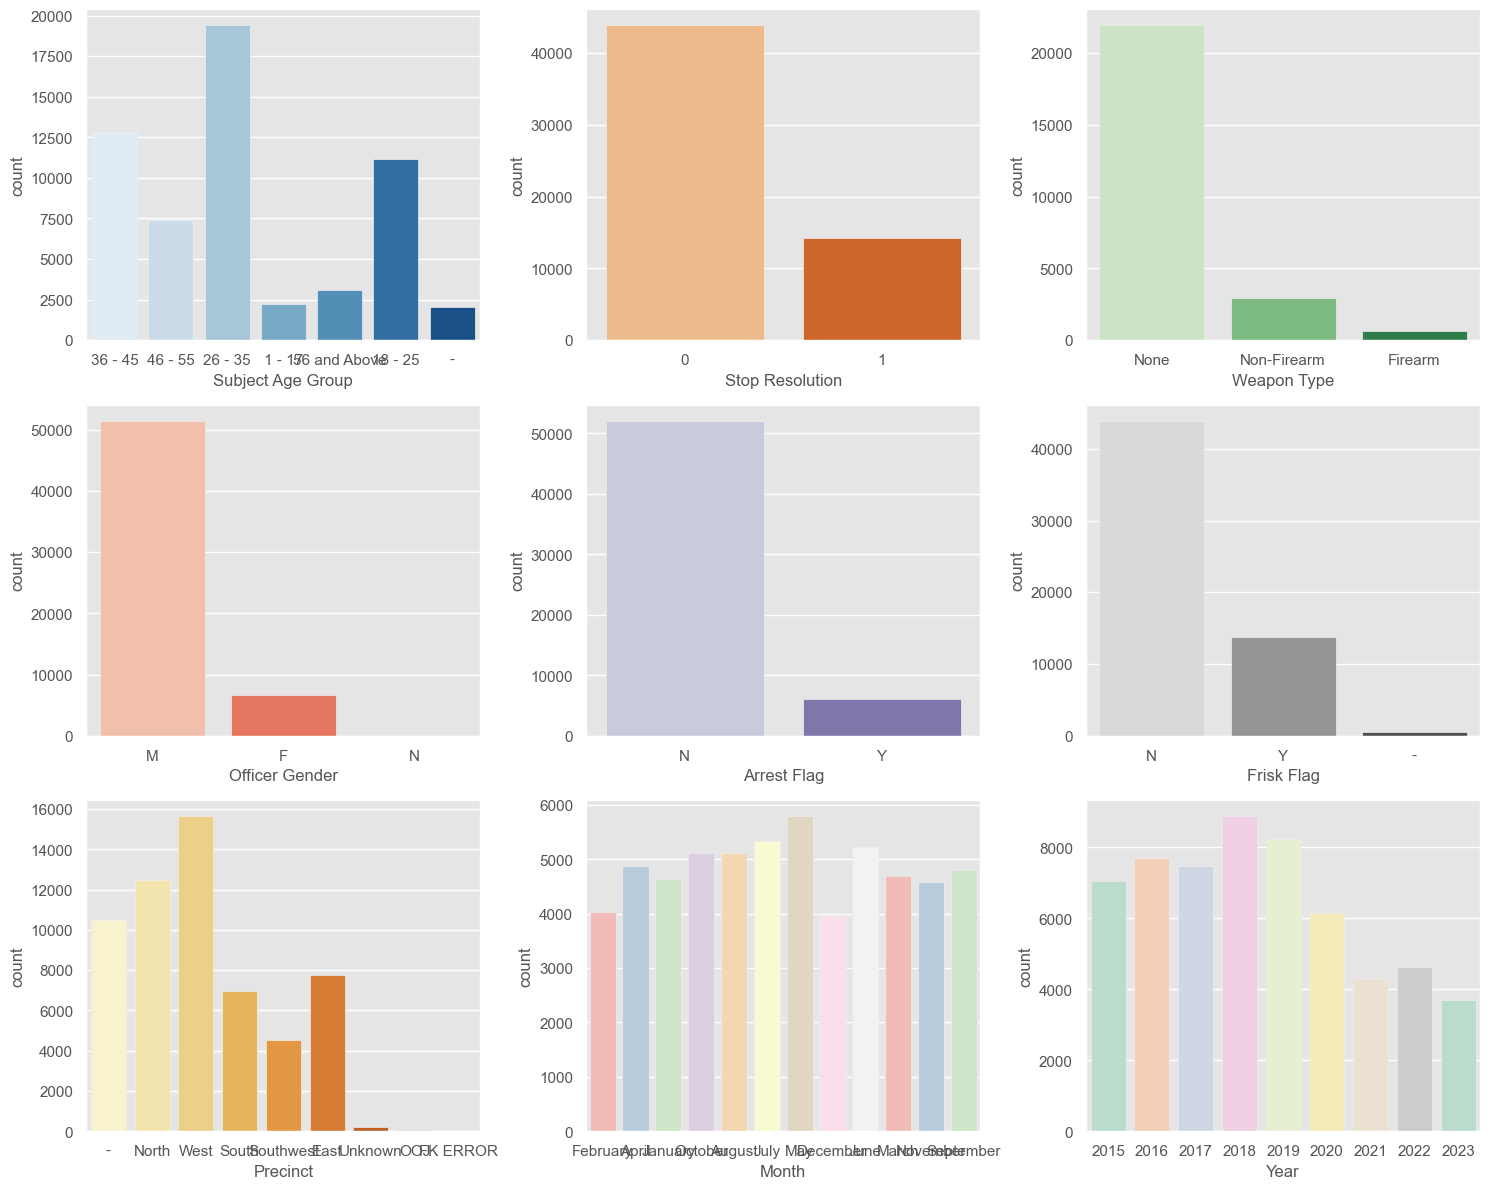

In [77]:
# Plot the count of each column in its own graph using different colors
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

sns.countplot(ax=axes[0, 0], x='Subject Age Group', data=df, palette='Blues')
sns.countplot(ax=axes[0, 1], x='Stop Resolution', data=df, palette='Oranges')
sns.countplot(ax=axes[0, 2], x='Weapon Type', data=df, palette='Greens')
sns.countplot(ax=axes[1, 0], x='Officer Gender', data=df, palette='Reds')
sns.countplot(ax=axes[1, 1], x='Arrest Flag', data=df, palette='Purples')
sns.countplot(ax=axes[1, 2], x='Frisk Flag', data=df, palette='Greys')
sns.countplot(ax=axes[2, 0], x='Precinct', data=df, palette='YlOrBr')
sns.countplot(ax=axes[2, 1], x='Month', data=df, palette='Pastel1')
sns.countplot(ax=axes[2, 2], x='Year', data=df, palette='Pastel2')

plt.tight_layout()
plt.show()


In these visualizations, we observe variations across different attributes. The 'Stop Resolution' plot, in particular, indicates that approximately a quarter of Terry stops result in an arrest. Further, we explore the temporal aspect, revealing potential trends.

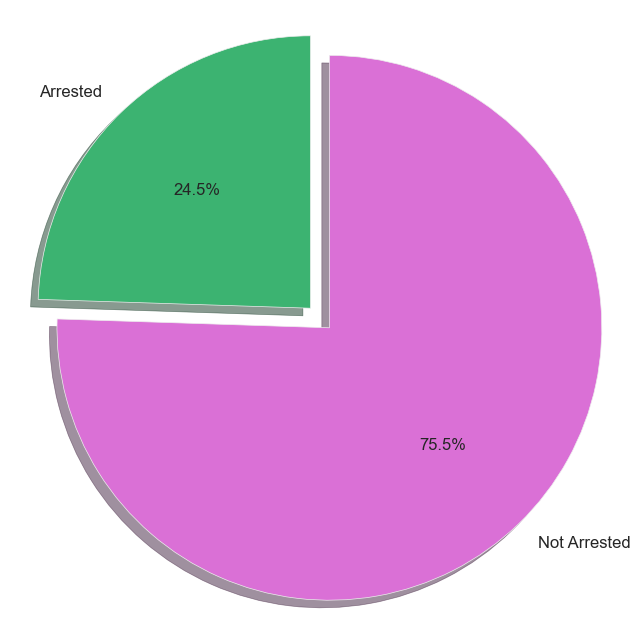

In [78]:
# Pie chart showing the percentage of arrests vs. non-arrests
labels = 'Arrested', 'Not Arrested'
sizes = [df['Stop Resolution'].sum(), (len(df['Stop Resolution']) - df['Stop Resolution'].sum())]
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=['Mediumseagreen', 'Orchid'],
        shadow=True, startangle=90, textprops={'fontsize': 12})
plt.axis('equal')
plt.show()


This pie chart illustrates that just under 24.5% of Terry stops culminate in an arrest.

Continuing our exploration, we investigate the relationship between arrests made during stops and those determined as the final resolution, shedding light on potential delays in arrest outcomes.

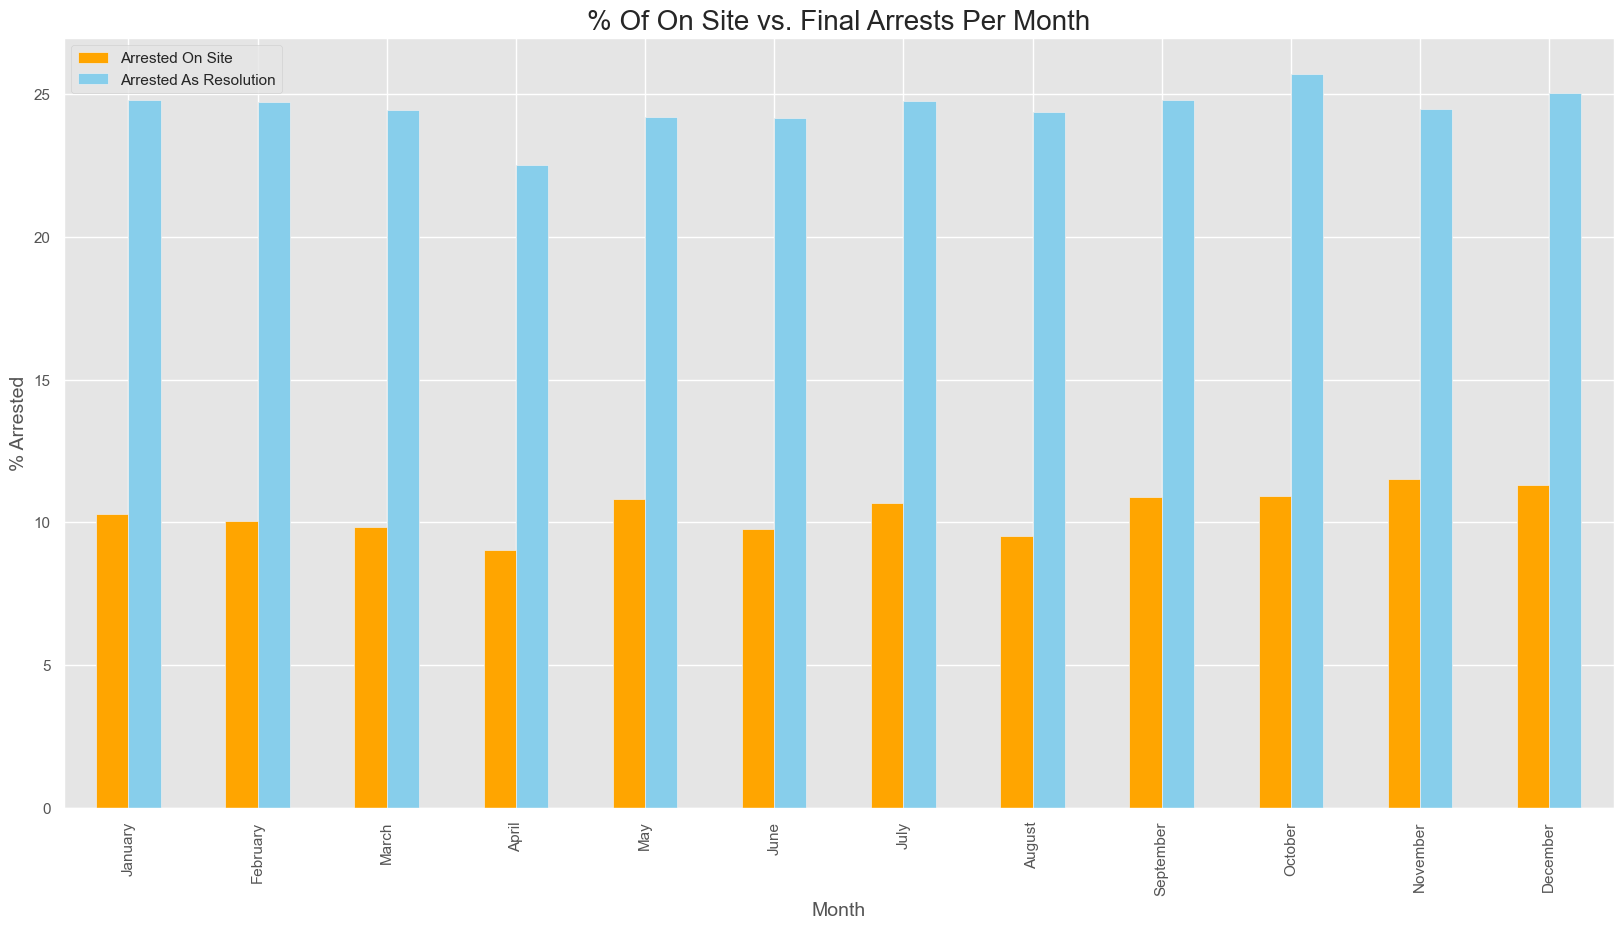

In [79]:
# Collect all rows of data were there was an arrest flag, meaning an arrest during the terry stop:
yes_arrest = df[df['Arrest Flag']=='Y']

# Calculate the percent of arrests made during the terry stop compared to the total number of terry stops per month
percent_yes= (yes_arrest['Arrest Flag'].groupby(df['Month']).count() / 
              df['Arrest Flag'].groupby(df['Month']).count())*100

# Re-order to be in the correct order by month:
percent_yes = percent_yes.reindex(["January", "February", "March","April","May","June","July",
                                   "August","September","October","November","December"])
# Turn into a dataframe:
percent_yes = pd.DataFrame(percent_yes)

# Do the same as above for the Stop Resolution column:
yes_arrest_resolution = df[df['Stop Resolution']==1]
percent_yes_resolution = (yes_arrest_resolution['Stop Resolution'].groupby(df['Month']).count() / 
                     df['Stop Resolution'].groupby(df['Month']).count())*100
percent_yes_final = percent_yes_resolution.reindex(["January", "February", "March","April","May","June","July",
                                                         "August","September","October","November","December"])
percent_yes_final = pd.DataFrame(percent_yes_final)

# Combine the above 2 dataframes into one dataframe and reset the index column:
combined_percent_yes = pd.concat([percent_yes,percent_yes_final],axis=1)
combined_percent_yes.reset_index(inplace=True)

# Create a bar chart comparing the % of arrests during the terry stop vs. % of arrests as a final resolution:
combined_percent_yes.plot(x='Month',y=["Arrest Flag","Stop Resolution"],kind="bar",figsize=(20,10),
                          color=['orange','skyblue'])
# Add chart title, labels, and legend
plt.title('% Of On Site vs. Final Arrests Per Month', fontsize=20)
plt.xlabel('Month', fontsize=14)
plt.ylabel('% Arrested', fontsize=14)
plt.legend(labels=['Arrested On Site','Arrested As Resolution']);

This analysis uncovers that, on average, less than 10% of stops result in immediate arrests. However, there's a substantial increase in the percentage of arrests determined as the final solution after the initial stop.

### Age Group Analysis

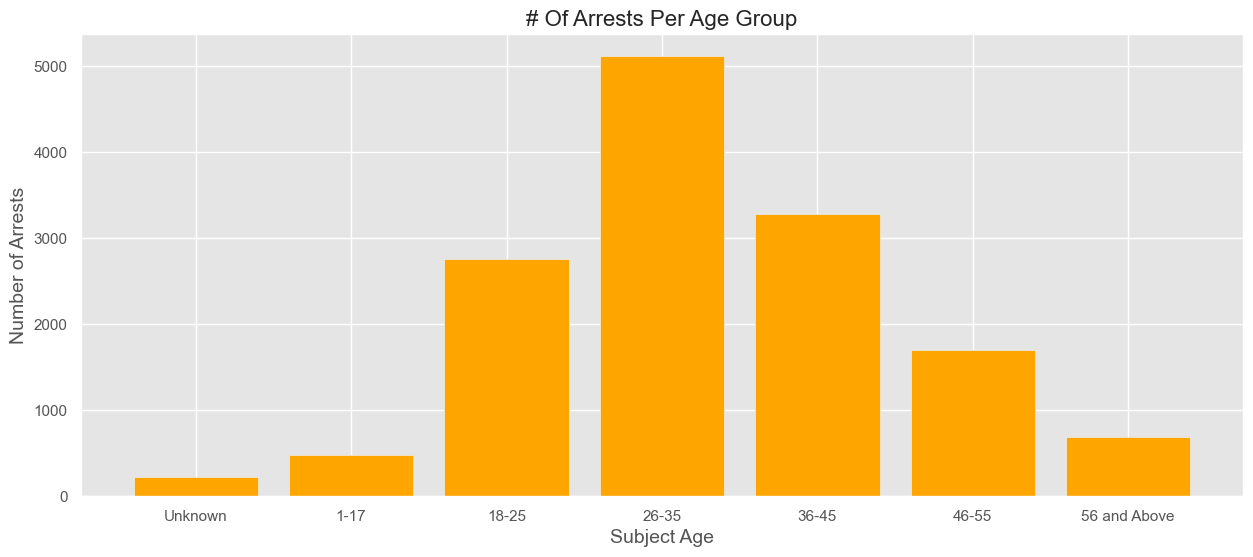

In [80]:
# Bar chart illustrating the number of arrests per age group
age_ranges = ['Unknown', '1-17', '18-25', '26-35', '36-45', '46-55', '56 and Above']
data_plot = df['Stop Resolution'].groupby(df['Subject Age Group']).sum()

plt.figure(figsize=(15, 6))
plt.bar(age_ranges, data_plot, color='orange')
plt.xlabel("Subject Age", fontsize=14)
plt.ylabel("Number of Arrests", fontsize=14)
plt.title('# Of Arrests Per Age Group', fontdict={'fontsize': 16})
plt.show()


Notably, individuals aged 26-35 are more frequently involved in arrests.

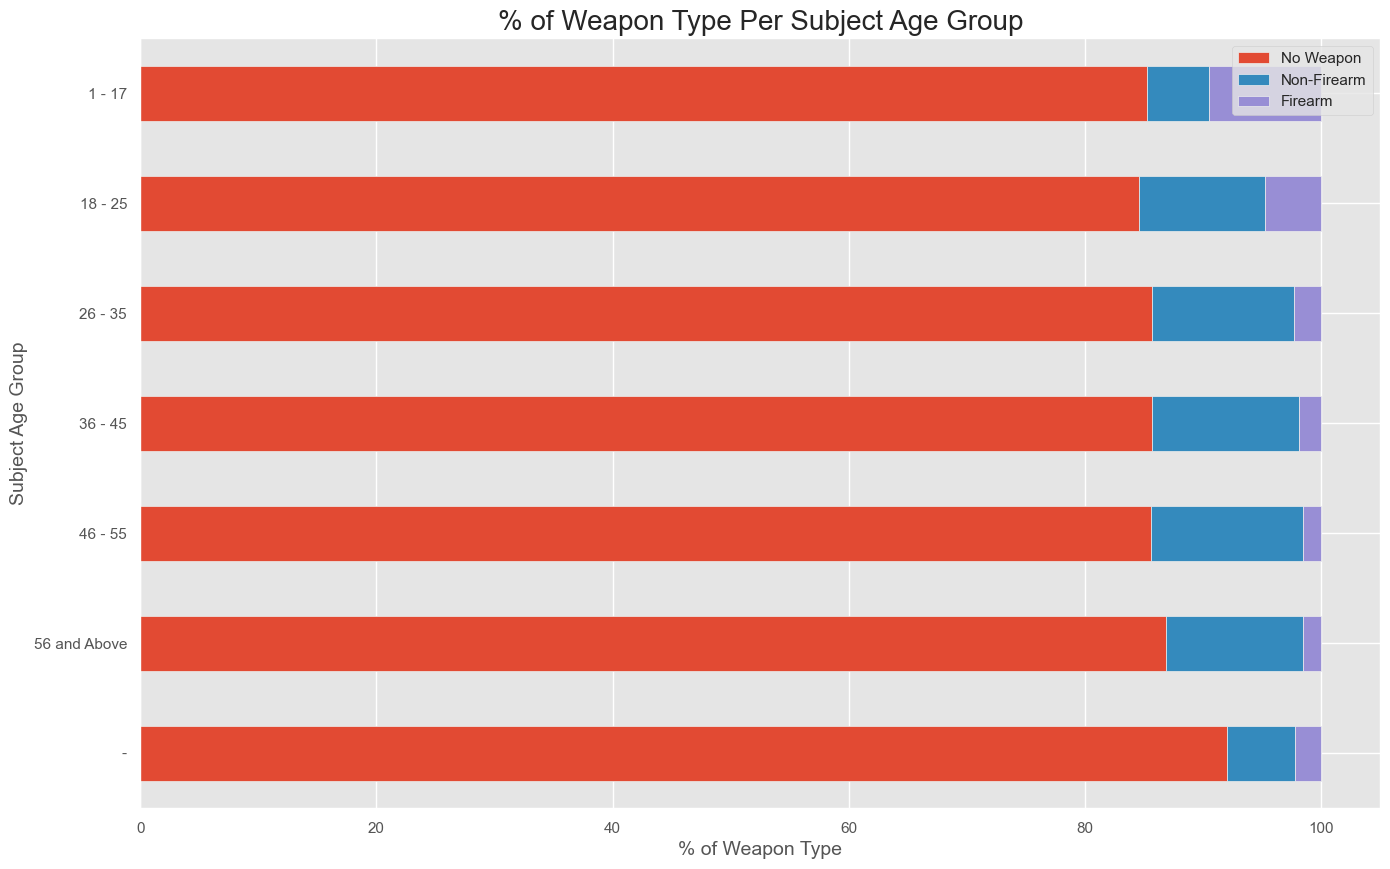

In [81]:
# Extract rows where no weapon was involved:
no_weapon = df[df['Weapon Type'] == 'None']

# Calculate the percentage of cases without weapons compared to total terry stops per age group:
no_weapon_percentage = (no_weapon['Weapon Type'].groupby(df['Subject Age Group']).count() /
                        df['Weapon Type'].groupby(df['Subject Age Group']).count()) * 100

# Reorder the percentages to align with age ranges:
no_weapon_percentage = no_weapon_percentage.reindex(["1 - 17", "18 - 25", "26 - 35", "36 - 45", "46 - 55",
                                                     "56 and Above", "-"])
# Convert to a DataFrame:
no_weapon_df = pd.DataFrame(no_weapon_percentage)

# Extract rows where a firearm was present:
firearm = df[df['Weapon Type'] == 'Firearm']
firearm_percentage = (firearm['Weapon Type'].groupby(df['Subject Age Group']).count() /
                      df['Weapon Type'].groupby(df['Subject Age Group']).count()) * 100
firearm_percentage = firearm_percentage.reindex(["1 - 17", "18 - 25", "26 - 35", "36 - 45", "46 - 55",
                                                 "56 and Above", "-"])
firearm_df = pd.DataFrame(firearm_percentage)

# Extract rows where a non-firearm weapon was present:
non_firearm = df[df['Weapon Type'] == 'Non-Firearm']
non_firearm_percentage = (non_firearm['Weapon Type'].groupby(df['Subject Age Group']).count() /
                          df['Weapon Type'].groupby(df['Subject Age Group']).count()) * 100
non_firearm_percentage = non_firearm_percentage.reindex(["1 - 17", "18 - 25", "26 - 35", "36 - 45", "46 - 55",
                                                         "56 and Above", "-"])
non_firearm_df = pd.DataFrame(non_firearm_percentage)

# Combine the three DataFrames into one and reset the index:
combined_weapon = pd.concat([no_weapon_df, non_firearm_df, firearm_df], axis=1)
combined_weapon.reset_index(inplace=True)

# Create a horizontal stacked bar chart comparing the percentage of weapon types per subject age group:
combined_weapon.plot(x='Subject Age Group', y="Weapon Type", kind="barh", stacked=True, figsize=(16, 10))
plt.gca().invert_yaxis()  # Reverse the order of the y-axis so 1-17 is at the top

# Add chart title, labels, and legend
plt.title('% of Weapon Type Per Subject Age Group', fontsize=20)
plt.xlabel('% of Weapon Type', fontsize=14)
plt.ylabel('Subject Age Group', fontsize=14)
plt.legend(labels=['No Weapon', 'Non-Firearm', 'Firearm'])
plt.show()


### Explore the relationship between age groups, weapons involved, and arrests:

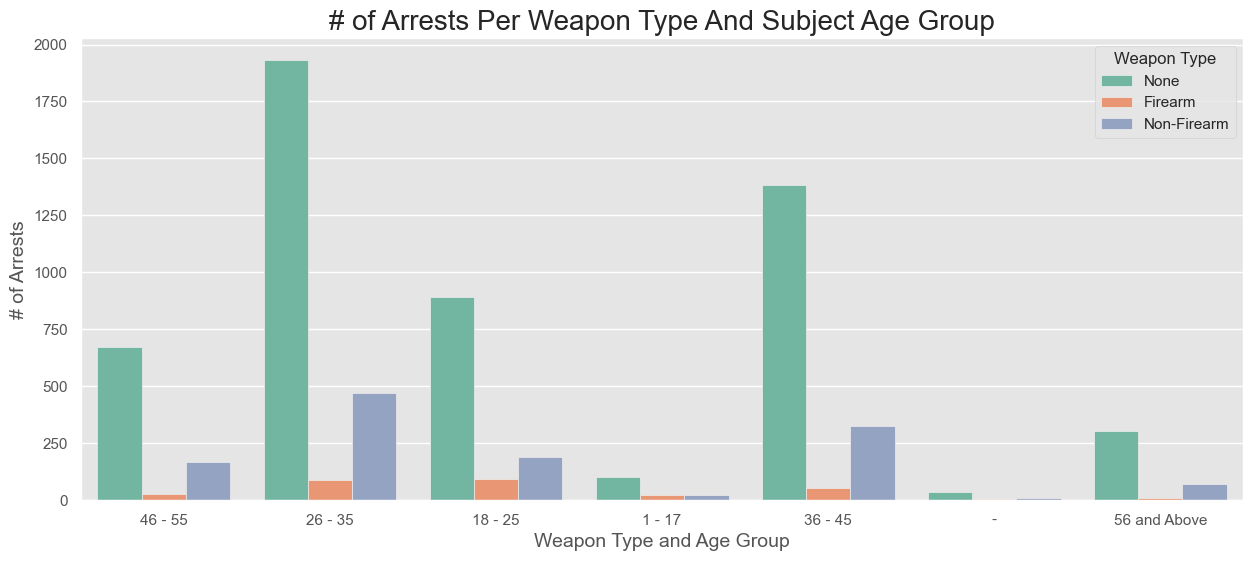

In [82]:
# Explore the relationship between age groups, weapons involved, and arrests:
# Check the distribution of weapon types for each age group in cases where arrests were made
plt.figure(figsize=(15, 6))
arrested = df[df['Stop Resolution'] == 1]
sns.countplot(data=arrested, x='Subject Age Group', hue='Weapon Type', palette='Set2')

# Add chart title, and labels:
plt.title('# of Arrests Per Weapon Type And Subject Age Group', fontsize=20)
plt.xlabel('Weapon Type and Age Group', fontsize=14)
plt.ylabel('# of Arrests', fontsize=14)
plt.show()

Observations:

- Similar to the overall trend, most arrests show no involvement of weapons.
- Notable spikes in weapons (both firearm and non-firearm) occur in the 18-25 and 26-35 age ranges.
- The 36-45 age range also exhibits a spike in non-firearm weapons.

### Investigate the impact of police officer gender on arrest likelihood:

In [83]:
# Filter out rows where officer gender was unidentified:
df = df[df['Officer Gender'] != 'N']

In [84]:
# Define chart labels and calculate the size of each pie slice for the overall chart:
labels_total = 'Female', 'Male'
sizes_total = [yes_arrest_resolution[yes_arrest_resolution['Officer Gender'] == 'F']['Officer Gender'].count(),
               yes_arrest_resolution[yes_arrest_resolution['Officer Gender'] == 'M']['Officer Gender'].count()]

# Define chart labels and calculate the size of each pie slice for female officers:
labels_female = 'Arrested', 'Not Arrested'
sizes_female = [df[df['Officer Gender'] == 'F']['Stop Resolution'].sum(),
                (len(df[df['Officer Gender'] == 'F']) - df[df['Officer Gender'] == 'F']['Stop Resolution'].sum())]

# Define chart labels and calculate the size of each pie slice for male officers:
labels_male = 'Arrested', 'Not Arrested'
sizes_male = [df[df['Officer Gender'] == 'M']['Stop Resolution'].sum(),
              (len(df[df['Officer Gender'] == 'M']) - df[df['Officer Gender'] == 'M']['Stop Resolution'].sum())]

# Display the number of female vs. male officers overall:
print('# of Female vs. Male officers', "\n", df['Officer Gender'].value_counts())

# of Female vs. Male officers 
 Officer Gender
M    51528
F     6609
Name: count, dtype: int64


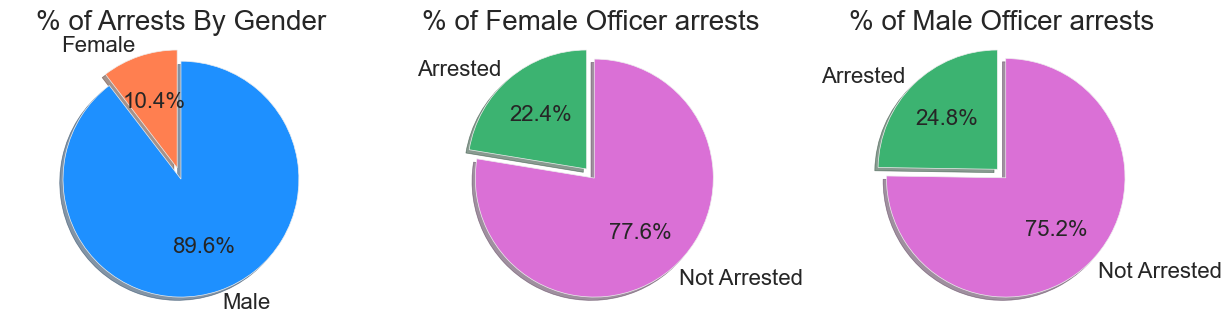

In [85]:

# Set up subplots for each pie chart and explode the arrested slice:
fig = plt.figure(figsize=(15, 12))
explode_slices = (0.1, 0)  # "explode" the arrested slice

# Plot pie chart of the % of arrests by gender:
ax1 = plt.subplot(331)
ax1.pie(sizes_total, explode=explode_slices, colors=['Coral', 'Dodgerblue'], labels=labels_total, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 16})
ax1.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax1.set_title('% of Arrests By Gender', fontsize=20)

# Plot pie chart for % of arrests vs non-arrests for female officers:
ax2 = plt.subplot(332)
ax2.pie(sizes_female, explode=explode_slices, colors=['Mediumseagreen', 'Orchid'], labels=labels_female, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 16})
ax2.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax2.set_title('% of Female Officer arrests', fontsize=20)

# Plot pie chart for % of arrests vs non-arrests for male officers:
ax3 = plt.subplot(333)
ax3.pie(sizes_male, explode=explode_slices, colors=['Mediumseagreen', 'Orchid'], labels=labels_male, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 16})
ax3.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
ax3.set_title('% of Male Officer arrests', fontsize=20)

plt.show()

Observations:

- Most arrests are made by male officers, reflecting the overall gender distribution among officers.
- When examining each gender individually, the arrest rates are similar.

In [86]:
# Determine the % of arrests for each precinct:
precinct_arrested = df[df['Stop Resolution'] == 1]
precinct_arrested_percentage = (precinct_arrested['Stop Resolution'].groupby(df['Precinct']).count() /
                                 df['Stop Resolution'].groupby(df['Precinct']).count()) * 100
precinct_arrested_df = pd.DataFrame(precinct_arrested_percentage)

Explore the variation in arrest percentages among different precincts:

In [87]:
# Determine the % of non-arrests for each precinct:
precinct_not_arrested = df[df['Stop Resolution'] == 0]
precinct_not_arrested_percentage = (precinct_not_arrested['Stop Resolution'].groupby(df['Precinct']).count() /
                                     df['Stop Resolution'].groupby(df['Precinct']).count()) * 100
precinct_not_arrested_df = pd.DataFrame(precinct_not_arrested_percentage)


In [88]:
# Pull together data into one dataframe:
combined_precinct_df = pd.concat([df['Precinct'].value_counts(), precinct_arrested_df, precinct_not_arrested_df],
                                 axis=1)
combined_precinct_df.columns = ['# of Terry Stops', '% Arrested', '% Not Arrested']
combined_precinct_df

,# of Terry Stops,% Arrested,% Not Arrested
Precinct,,,
West,15634,30.977357,69.022643
North,12480,24.775641,75.224359
-,10475,3.627685,96.372315
East,7734,32.350659,67.649341
South,6976,31.393349,68.606651
Southwest,4535,25.755237,74.244763
Unknown,200,25.500000,74.500000
OOJ,81,8.641975,91.358025
FK ERROR,22,18.181818,81.818182


### Modeling
Data Splitting

In [89]:
# Split the data into training and testing sets to avoid overfitting or underfitting the model:

X = df.loc[:, ['Subject Age Group', 'Weapon Type', 'Arrest Flag', 'Frisk Flag', 'Precinct', 'Month',
               'Year', 'Officer Age', 'Officer Gender']]
y = df.loc[:, 'Stop Resolution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


One-Hot Encoding

In [90]:
# Perform one-hot encoding to convert categorical data into a numerical format:

ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()

In [91]:
# Create dataframes with encoded features for both training and testing sets:
ohe_df_train = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out())
ohe_df_test = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out())

In [92]:
ohe_df = pd.concat([ohe_df_train,ohe_df_test])

In [93]:
ohe_df

,Subject Age Group_-,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Weapon Type_Firearm,Weapon Type_Non-Firearm,Weapon Type_None,...,Officer Age_69,Officer Age_70,Officer Age_71,Officer Age_72,Officer Age_74,Officer Age_75,Officer Age_77,Officer Age_123,Officer Gender_F,Officer Gender_M
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17437,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17438,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17439,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17440,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Explore different classification models and evaluate their performance:

In [94]:
# Define a function to plot a confusion matrix:
def confusion_matrix_plot(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # Function to create a confusion matrix chart for model performance visualization
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()

In [95]:
# Define class names for Arrested (1) and Not Arrested (0):
class_names = ['Arrested', 'Not Arrested']

###  Decision Trees

Let's explore decision trees, which use a tree-like structure for classification by efficiently partitioning samples into sets with similar data points.

###  Grid Search for Optimal Parameters

 We'll begin by running a grid search to identify the optimal parameters for our decision tree model:


In [96]:
# Declare a baseline classifier:
dtree = DecisionTreeClassifier()

In [97]:
# Create a parameter grid for grid search:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 10),
    "min_samples_split": range(2, 10)
}

In [98]:
# Perform grid search to find the best parameters:
gs_tree = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)
gs_tree.fit(X_train_ohe, y_train)

# Print the best estimator parameters:
print(gs_tree.best_params_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}


###  Decision Tree Classification

Now, we'll use the best parameters identified from grid search to build and evaluate our decision tree model:


In [99]:
# Create the decision tree classifier with best parameters:
d_tree = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=2)
d_tree.fit(X_train_ohe, y_train)
y_pred_dtree = d_tree.predict(X_test_ohe)

In [100]:
# Check the accuracy of the decision tree model:
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print('Decision Tree Accuracy: {:.2f}%'.format(accuracy_dtree * 100))

Decision Tree Accuracy: 85.85%


In [101]:
# Print the classification report:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     13190
           1       1.00      0.42      0.59      4252

    accuracy                           0.86     17442
   macro avg       0.92      0.71      0.75     17442
weighted avg       0.88      0.86      0.84     17442



###  Confusion Matrix for Decision Tree

Visualize the performance of the decision tree using a confusion matrix:

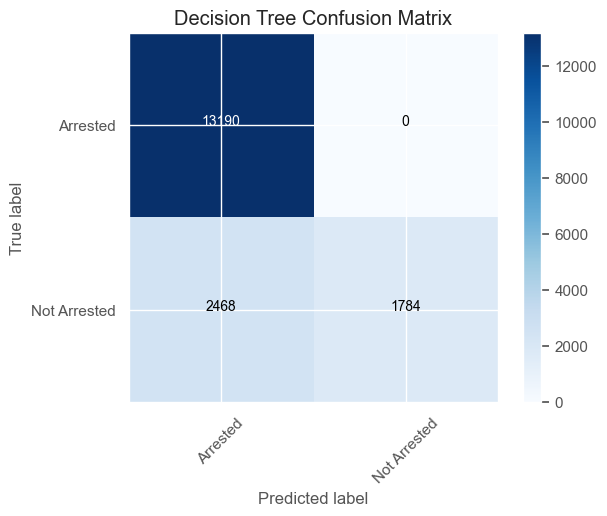

In [102]:
import itertools

# Create the confusion matrix for decision tree:
cm_dtree = confusion_matrix(y_test,y_pred_dtree)
# Plot the confusion matrix:
confusion_matrix_plot(cm_dtree, classes=class_names, title='Decision Tree Confusion Matrix')

###  K-Nearest-Neighbors (KNN) Classifier

The K-Nearest Neighbors (KNN) technique predicts a data point's class by considering the k-nearest data points and predicting the majority class among them. It assumes that closer points are more similar.

4.2.1 Find Optimal k Value

In [103]:
# Determine the optimal k value for KNN classification:

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k + 1, 2):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {:.4f}".format(best_score))

In [104]:
# Call the function to find the best k value:
find_best_k(X_train_ohe, y_train, X_test_ohe, y_test)

Best Value for k: 25
Accuracy Score: 0.8574


###  KNN Classification

Build and evaluate the KNN model using the optimal k value:

In [105]:
# Create the KNN classifier with the best k value:
knn = KNeighborsClassifier(n_neighbors=25, algorithm='brute')
knn.fit(X_train_ohe, y_train)
y_pred_knn = knn.predict(X_test_ohe)

In [106]:
# Check the accuracy of the KNN model:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('KNN Accuracy: {:.2f}%'.format(accuracy_knn * 100))

KNN Accuracy: 85.74%


In [107]:
# Print the classification report for KNN:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     13190
           1       0.89      0.48      0.62      4252

    accuracy                           0.86     17442
   macro avg       0.87      0.73      0.77     17442
weighted avg       0.86      0.86      0.84     17442



### Confusion Matrix for KNN

Visualize the performance of the KNN model using a confusion matrix:

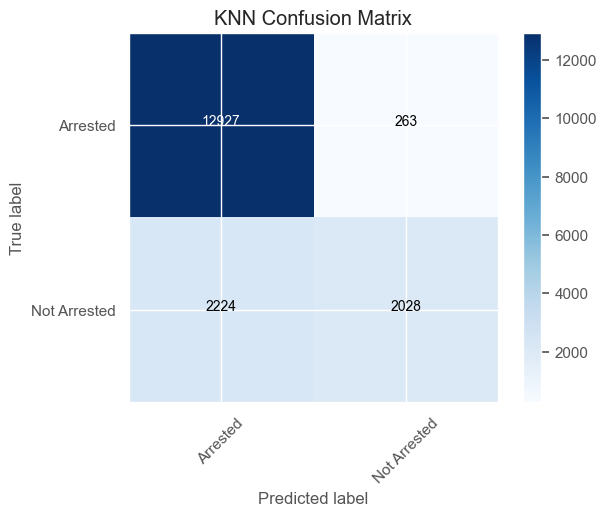

In [108]:
# Create the confusion matrix for KNN:
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix:
confusion_matrix_plot(cm_knn, classes=class_names, title='KNN Confusion Matrix')

### Logistic Regression

Logistic regression is a regression technique used for predicting binary response variables, yielding a sigmoid function (S-shaped). It is particularly suitable for classification tasks where the outcome is binary.

 4.3.1 Logistic Regression Classification
 
 Build and evaluate the logistic regression model:


In [109]:
# Create the logistic regression classifier, fit it on the training data, and make predictions on the test set:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_ohe, y_train)
y_pred_logreg = logreg.predict(X_test_ohe)

In [110]:
# Check the accuracy of the logistic regression model:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Logistic Regression Accuracy: {:.2f}%'.format(accuracy_logreg * 100))

Logistic Regression Accuracy: 85.74%


In [111]:
# Print the classification report for logistic regression:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     13190
           1       0.92      0.46      0.61      4252

    accuracy                           0.86     17442
   macro avg       0.88      0.72      0.76     17442
weighted avg       0.87      0.86      0.84     17442



4.3.2 Confusion Matrix for Logistic Regression

Visualize the performance of the logistic regression model using a confusion matrix:

In [112]:
# Create the confusion matrix for logistic regression:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

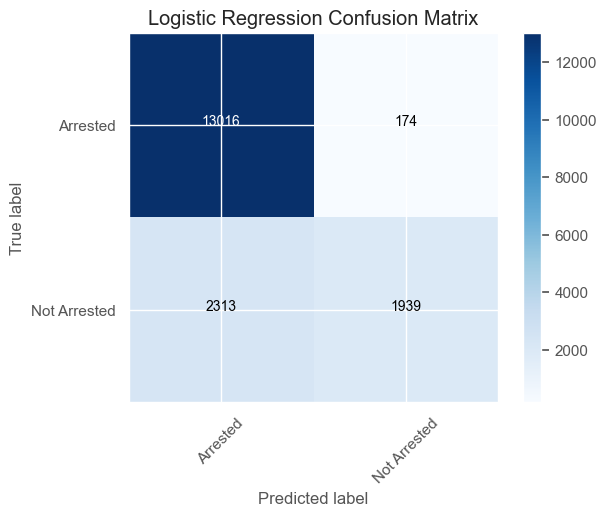

In [113]:
# Plot the confusion matrix:
confusion_matrix_plot(cm_logreg, classes=class_names, title='Logistic Regression Confusion Matrix')

After running our classification models, we can evaluate their performance based on accuracy scores:

Decision Tree:
- Accuracy: 85.85%

KNN:
- Accuracy: 85.74%

Logistic Regression:
- Accuracy: 85.74%

Clearly, the Decision Tree classification demonstrates the highest accuracy. To gain insights into the model's feature importance, we focus on the top 30 impactful features:

In [114]:
model_performance_data = {
    'Decision Tree': 85.85,
    'KNN': 85.74,
    'Logistic Regression': 85.74,
}

# Convert the dictionary to a DataFrame
model_performance_df = pd.DataFrame(list(model_performance_data.items()), columns=['Model', 'Accuracy Score (%)'])

# Display the DataFrame
print(model_performance_df)


                 Model  Accuracy Score (%)
0        Decision Tree               85.85
1                  KNN               85.74
2  Logistic Regression               85.74


### EVALUATION

The presented table showcases the accuracy scores of different classification models – Decision Tree, K-Nearest Neighbors (KNN), and Logistic Regression. The primary metric used for evaluation is the accuracy score, which indicates the proportion of correctly predicted instances among the total instances.

1. **Decision Tree:**
   - **Accuracy Score: 85.85%**
   - The Decision Tree model exhibits the highest accuracy among the three models. This suggests that, based on the provided features, the Decision Tree algorithm is effective in accurately classifying whether a Terry stop results in an arrest or not.

2. **K-Nearest Neighbors (KNN):**
   - **Accuracy Score: 85.74%**
   - The KNN model closely trails the Decision Tree in accuracy, showcasing its competitive performance. KNN relies on the similarity of instances, and its ability to achieve a high accuracy score suggests its suitability for this classification task.

3. **Logistic Regression:**
   - **Accuracy Score: 85.74%**
   - Similar to KNN, Logistic Regression also achieves an accuracy score of 85.74%. Logistic Regression is commonly used for binary classification tasks, and its performance in this context aligns with that of the KNN model.

**Key Observations:**
- All three models demonstrate strong predictive capabilities, surpassing an 85% accuracy threshold. This implies that the chosen features and model configurations effectively capture patterns in the data related to Terry stops and arrest outcomes.

**Considerations for Further Analysis:**
- While accuracy is a valuable metric, further analysis could involve examining other metrics such as precision, recall, and F1-score to gain insights into the models' performance across different aspects of classification.

**Conclusion:**
The Decision Tree, KNN, and Logistic Regression models perform remarkably well in predicting the outcomes of Terry stops, showcasing their potential for aiding law enforcement decision-making processes. Further exploration, including fine-tuning hyperparameters and evaluating additional metrics, can contribute to a comprehensive understanding of their effectiveness in real-world scenarios.

Recommendations:

1. Conduct training programs for law enforcement officers to enhance their judgment on deciding when it is suitable to make an arrest during a Terry stop. Providing clear guidelines on differentiating situations requiring immediate action from those that can be addressed later can contribute significantly to reducing unnecessary arrests.

2. Emphasize the importance of recording the officer's precinct in all Terry stops. This additional data point can enhance the predictive capabilities of the model, allowing for a more nuanced analysis of factors contributing to potential arrests.

3. Implement training modules for officers to recognize optimal situations for conducting a 'frisk' during Terry stops. Understanding the appropriate circumstances for frisking individuals can serve as a crucial indicator in predicting arrests accurately.
